# Dimensionality Reduction

## 차원의 정의
공간 내 데이터의 위치를 나타내기 위해 필요한 축의 개수


* 차원과 변수
    * 데이터가 n개 설명 변수를 가진다면 n차원의 좌표 상에서 표현 할 수 있다
    * 키, 몸무게, 머리 길이를 설명 변수로 갖는 데이터


## 차원의 저주: Curse of Dimensionality
변수가 늘어나면거 차원이 커짐에 따라 발생하는 문제

* 필요한 데이터 수의 지수 함수적 증가로 인한 정보의 밀도 감소
* 공간을 설명하기 위한 데이터의 부족
    * 과적합 문제 & 성능 감소


## 차원 축소
* 데이터를 잘 설명 할 수 있는 변수의 개수(latent space)는 현재 변수의 개수(observation space)보다 작을 수 있다.
* 데이터를 기반으로 잠재 공간을 파악하는 것

* 차원 축소의 효과
    * 차원의 저주 해결
    * 연산량 감소
    * 시각화 용이


* 변수 활용
    * 관계되는 변수만 사용한다; 불필요한 변수는 제거
    * 원뵨 데이터를 조합해 새로운 변수를 생성

## 변수 추출 방법: PCA : Principal Component Analysis
* 여러 변수의 정보를 담고 있는 주성분(principal component)이라는 새로운 변수를 생성하는 차원 축소 기법
* 단순히 차원을 줄이기 보다는 관측된 차원이 아닌 실제 데이터를 설명하는 차원을 찾아서 데이터를 잘 이해하고자 함
* 비지도 학습
* 분산(variance)을 최대로 보존하는 초평면(hyperplan) 선택
    * 원본 데이터 셋과 투영된 초평면의 평균제곱거리를 최소화
    * 정보를 가장 적게 손실하기 때문
* 주성분 축을 찾는 방법
    * 데이터 표준화: 데이터를 표준화하지 않으면 값의 크기에 따라 공분산이 영향을 받음
    * 공분산 행렬 생성
    * 고유값 분해
    * K개 벡터의 새로운  basis
        * scree plot
        * explained variance


* 장점
    * 변수간 상관관계 및 연관성을 이용해 변수를 생성
    * 차원 축소로 차원의 저주 해결

* 단점
    * 데이터의 선형성이 없다면 적용 불가능
    * 데이터의 클래스를 고려라지 않기 때문에 최대 분산 방향이 특징 구분을 좋게 한다고 보장 할 수 없음
    * 주성분의 해석을 위한 도메인 지식 필요




## 변수 추출 방법: LDA : Linear Discriminant Analysis
* 데이터의 분포를 학습하여 분리를 최적화하는 결정경계를 만들어 데이터를 분류하는 모델
* 지도 학습
* 목표: 클래스 간의 분산을 크게, 클래스 내의 분산을 작게 함

## 변수 추출 방법: t-SNE: t-distributed Stochastic Neighbor Embedding
고차원의 데이터를 저차원의 데이터로 거리 관계를 유지하며 Projection 하는 기법
 
* 학습방법
1. 랜덤 순서로 나열
2. 데이터 하나에 대해서 동일 군집은 당기는 힘, 다른 군집은 미는 힘 계산
3. 데이터를 힘의 균형에 맞는 위치로 이동
4. 모든 점들에 대해서 2~3 과정 방법

* 장점
    * 직관적으로 데이터의 구조를 시각화하여 확인 할 수 있다.

* 단점
    * 거리를 학습하여 계속 업데이트를 하기 때문에 값이 매번 바뀜
    * PCA, LDA와 다르게 결과를 변수로 사용할 수 없음
    * 데이터 수가 많아지면 시간이 오래 걸림


# [실습] 차원축소 시각화

In [ ]:
# setting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [ ]:
# data load
from sklearn.datasets import load_digits

digits = load_digits()

data, target = digits["data"], digits["target"]

In [ ]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [ ]:
data[0].shape

(64,)

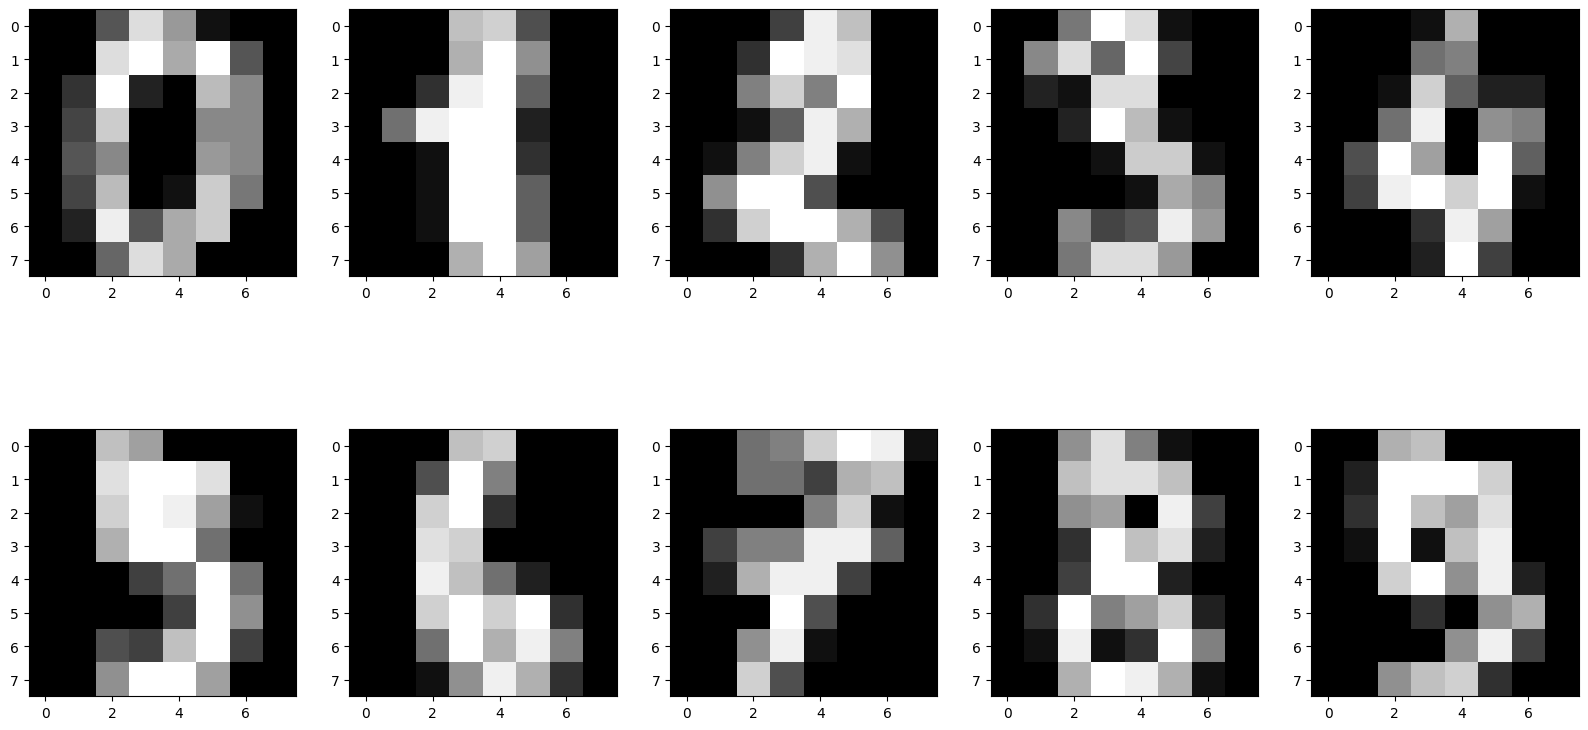

In [ ]:
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap="gray")

In [ ]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(data)

## PCA

In [ ]:
# 학습
from sklearn.decomposition import PCA

pca = PCA()

In [ ]:
pca.fit(scaled_data)

PCA()

In [ ]:
# PCA는 첫 번째 주성분이 가장 크며 갈수록 작아진다.
pca.explained_variance_

array([7.34477606e+00, 5.83549054e+00, 5.15396118e+00, 3.96623597e+00,
       2.96634520e+00, 2.57204442e+00, 2.40600941e+00, 2.06867355e+00,
       1.82993314e+00, 1.78951739e+00, 1.69784616e+00, 1.57287889e+00,
       1.38870781e+00, 1.35933609e+00, 1.32152536e+00, 1.16829176e+00,
       1.08368678e+00, 9.99778617e-01, 9.74382931e-01, 9.08912418e-01,
       8.22719264e-01, 7.76310139e-01, 7.11556753e-01, 6.45523648e-01,
       5.95273988e-01, 5.76501797e-01, 5.26731552e-01, 5.10636301e-01,
       4.86863813e-01, 4.55601071e-01, 4.42851552e-01, 4.22300863e-01,
       3.99106303e-01, 3.91101111e-01, 3.60945168e-01, 3.48603059e-01,
       3.19596300e-01, 2.94066271e-01, 2.76922851e-01, 2.58273004e-01,
       2.47830286e-01, 2.42356600e-01, 2.17581996e-01, 2.07995927e-01,
       2.00090902e-01, 1.89835165e-01, 1.76128942e-01, 1.68752359e-01,
       1.58184741e-01, 1.43114274e-01, 1.33210813e-01, 1.24263708e-01,
       1.19328984e-01, 1.11886547e-01, 1.02504338e-01, 9.84087608e-02,
      

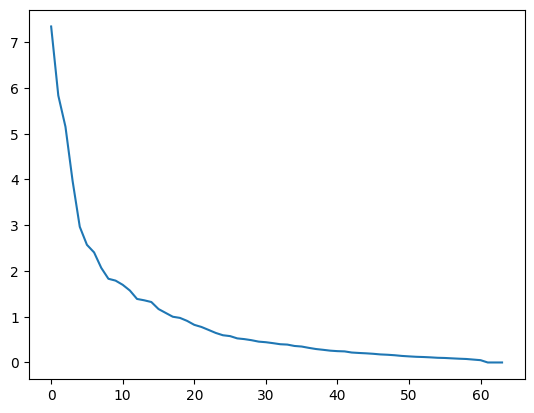

In [ ]:
plt.plot(pca.explained_variance_)

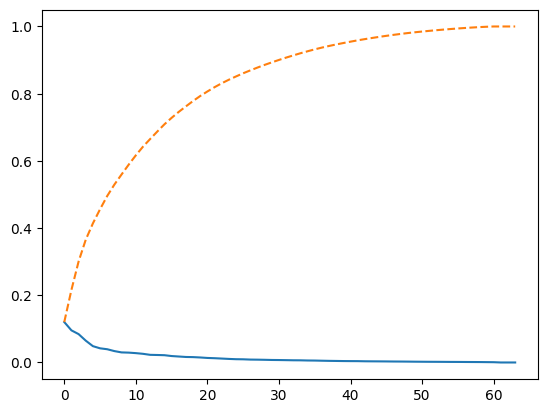

In [ ]:
# 분산을 비율로 표현
pca.explained_variance_ratio_

plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum(), linestyle="--")

In [ ]:
# 제한된 PCA
## 비율로 사용하는 방법
## 0~1사이가 들어올 경우 설명된 분산이 해당 값에 도달할 때까지 주성분을 선택

ratio_pca = PCA(n_components=0.8)
ratio_pca.fit(scaled_data)


PCA(n_components=0.8)

In [ ]:
ratio_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 ])

In [ ]:
ratio_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732])

In [ ]:
##선택된 주성분 갯수 확인

ratio_pca.n_components_

21

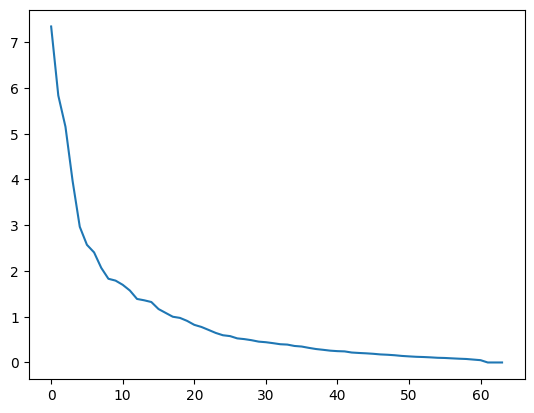

In [ ]:
# 개수를 지정해서 사용하는 방법
# int 값으로 1보다 큰 값을 줄 경우에는 지정된 개수만큼의 주성분을 계산

plt.plot(pca.explained_variance_)

In [ ]:
# elbow point인 8개의 주성분만 선택|
n_comp_pca = PCA(n_components=8)
n_comp_pca.fit(scaled_data)

PCA(n_components=8)

In [ ]:
n_comp_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444414, 0.06498392, 0.04860127,
       0.04214067, 0.03941842, 0.03388898])

In [ ]:
n_comp_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.2159497 , 0.30039384, 0.36537776, 0.41397902,
       0.45611969, 0.49553812, 0.52942709])

In [ ]:
n_comp_pca.n_components_

8

In [ ]:
# 시각화
# 2차원 또는 3차원으로 데이터를 축소한 후 시각화를 진행
# 2차원으로 차원 축소는 주성분의 개수를 2개로, 3차원으로 차원 축소는 주성분의 개수를 3개

viz_pca = PCA(n_components=2)
viz_pca_latent = viz_pca.fit_transform(scaled_data)

In [ ]:
def visualize_latent_space_with_label(latent):
    for label in np.unique(target):
        index = target == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

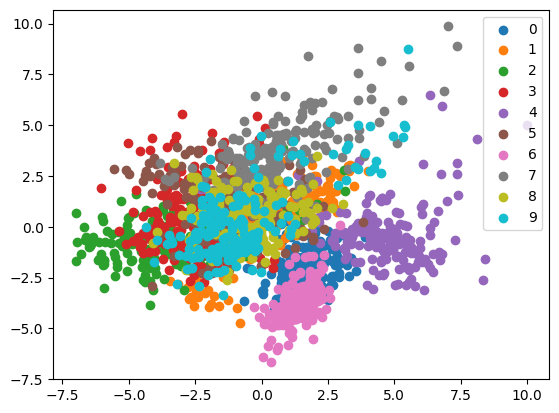

In [ ]:
visualize_latent_space_with_label(viz_pca_latent)

## LDA

In [ ]:
# 학습
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(scaled_data, target)

LinearDiscriminantAnalysis()

In [ ]:
# 분산
# LDA는 eigenvalue와 같이 분산의 크기를 나타내는 값은 없음

lda.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

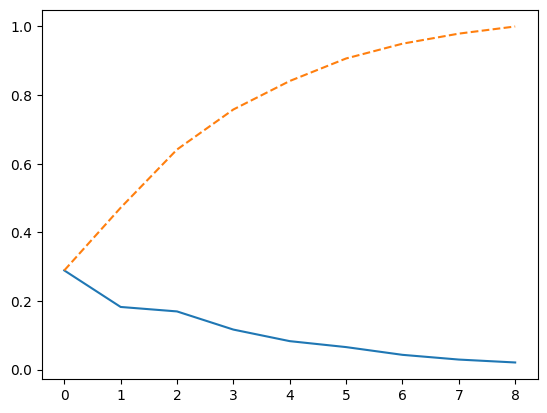

In [ ]:
plt.plot(lda.explained_variance_ratio_)
plt.plot(lda.explained_variance_ratio_.cumsum(), linestyle="--")

In [ ]:
# 시각화
viz_lda = LinearDiscriminantAnalysis(n_components=2)
viz_lda_latent = viz_lda.fit_transform(scaled_data, target)

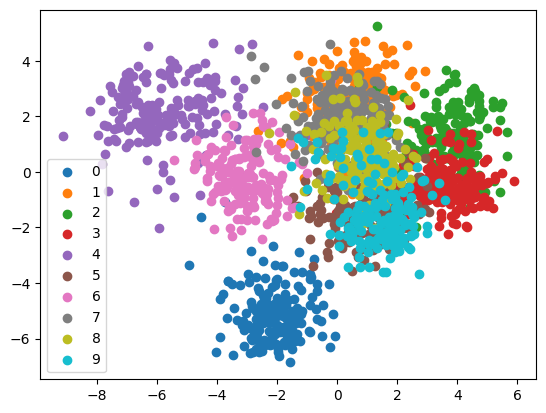

In [ ]:
visualize_latent_space_with_label(viz_lda_latent)

## t-SNE


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

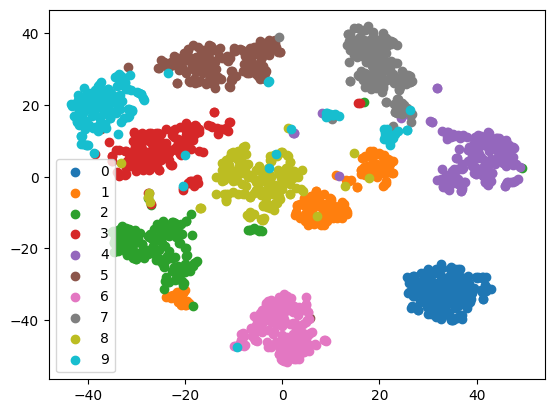

In [ ]:
# 시각화
tsne_latent = tsne.fit_transform(scaled_data)

visualize_latent_space_with_label(tsne_latent)

## 비교 보기


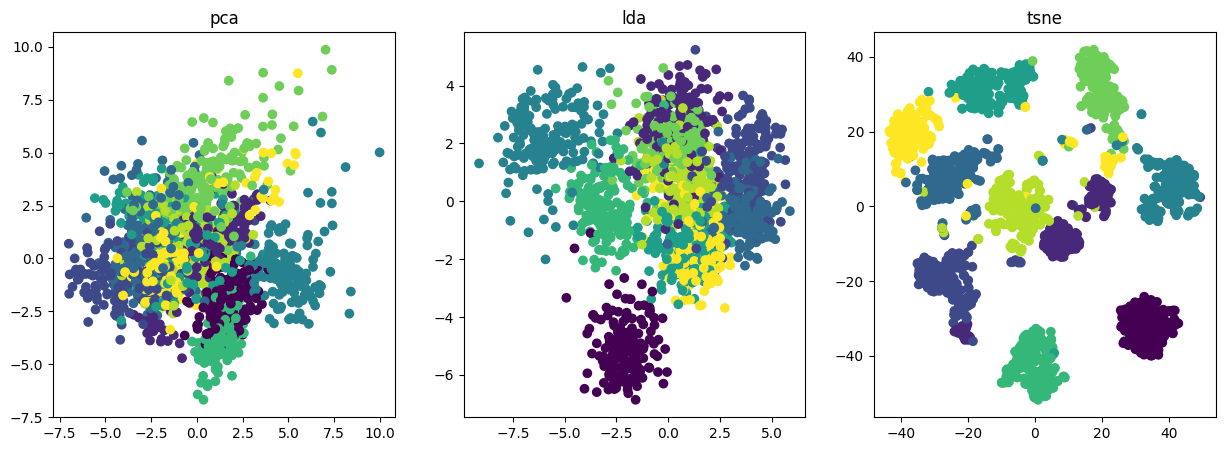

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
latents = [
    ("pca", viz_pca_latent),
    ("lda", viz_lda_latent),
    ("tsne", tsne_latent)
]
for idx, (name, latent) in enumerate(latents):
    ax = axes[idx]
    ax.scatter(latent[:, 0], latent[:, 1], c=target)
    ax.set_title(name)

# [실습] 차원 축소와 군집화

In [ ]:
# setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

In [ ]:
# data load
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
data, target = digits["data"], digits["target"]

In [ ]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [ ]:
# data 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(data)

In [ ]:
# 시각화
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [ ]:
tsne_latent = tsne.fit_transform(scaled_data)

In [ ]:
def visualize_latent_space_with_label(latent, pred):
    for label in np.unique(pred):
        index = pred == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

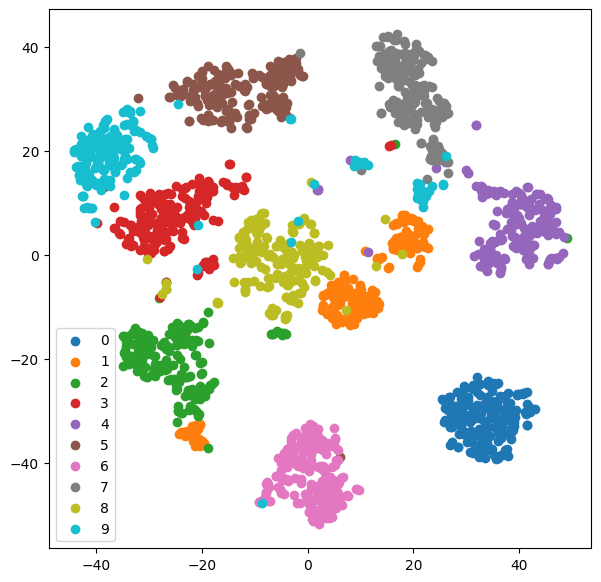

In [ ]:
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, target)

## Clustering


In [ ]:
# 학습
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

In [ ]:
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
# 예측
pred = kmeans.predict(scaled_data)

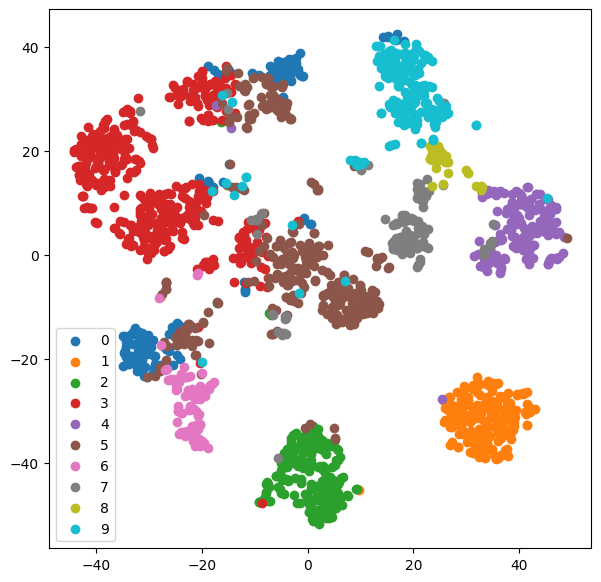

In [ ]:
# 시각화
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pred)

## PCA & Clustering

In [ ]:
# 차원을 축소 시킨 데이터 생성
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca.fit(scaled_data)

PCA(n_components=12)

In [ ]:
pca_data = pca.transform(scaled_data)

In [ ]:
# k-means 학습
pca_kmeans = KMeans(n_clusters=10)

pca_kmeans.fit(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
# 예측
pca_pred = pca_kmeans.predict(pca_data)

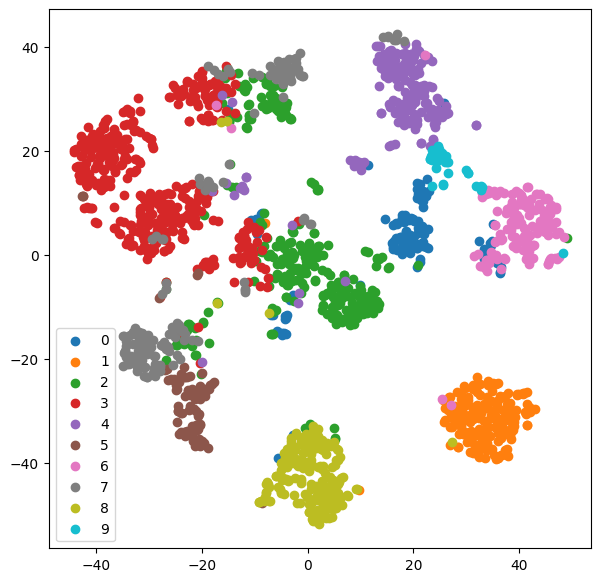

In [ ]:
# 시각화
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pca_pred)

## 비교 보기


Text(0.5, 1.0, 'PCA Clustering')

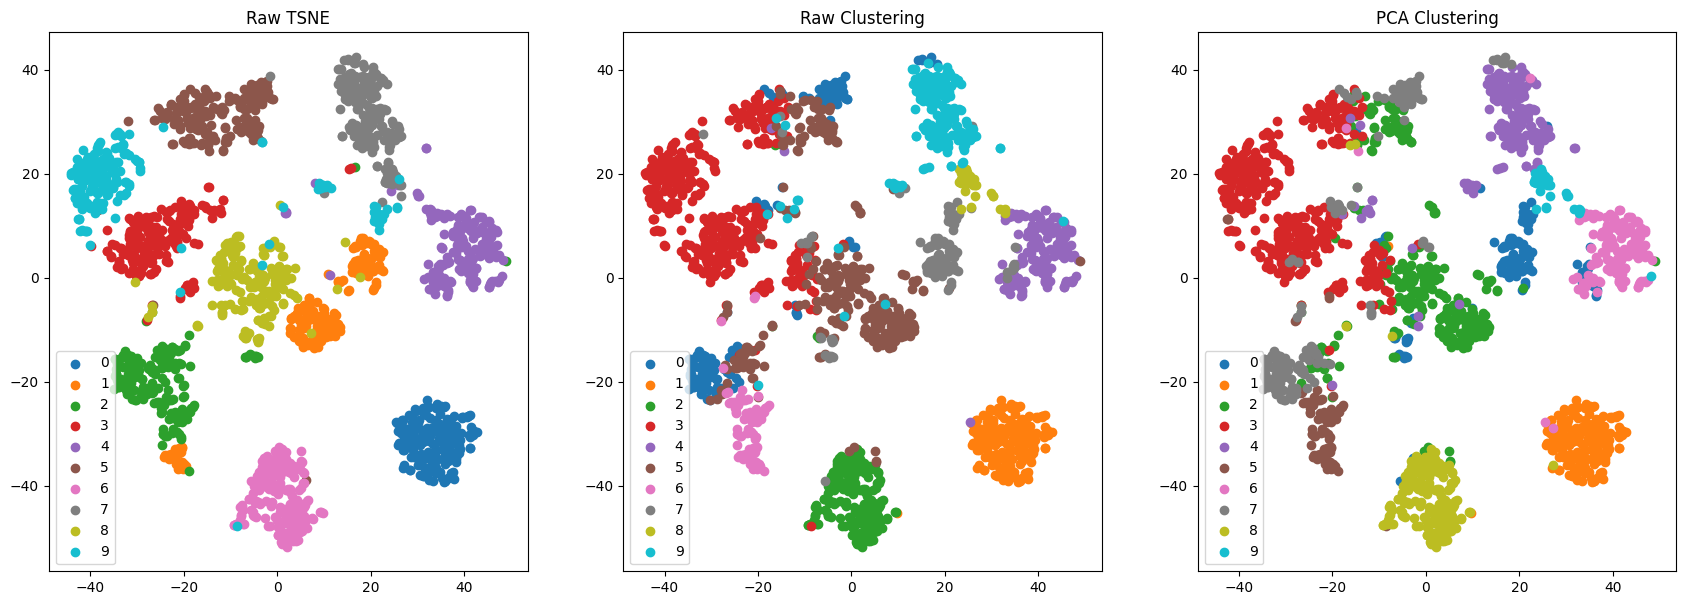

In [ ]:
plt.figure(figsize=(21, 7))
plt.subplot(131)
visualize_latent_space_with_label(tsne_latent, target)
plt.title("Raw TSNE")
plt.subplot(132)
visualize_latent_space_with_label(tsne_latent, pred)
plt.title("Raw Clustering")
plt.subplot(133)
visualize_latent_space_with_label(tsne_latent, pca_pred)
plt.title("PCA Clustering")

In [ ]:
scaled_data.shape

(1797, 64)

In [ ]:
pca_data.shape

(1797, 12)

# [실습] Eigenface와 얼굴 사진 분류


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

In [ ]:
# data load
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
data, target = faces["data"], faces["target"]

In [ ]:
# data EDA
n_samples, h, w = faces.images.shape

In [ ]:
n_samples, h, w

(1288, 50, 37)

In [ ]:
# 얼굴과 이름 확인
target_names = faces.target_names
n_classes = target_names.shape[0]

In [ ]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

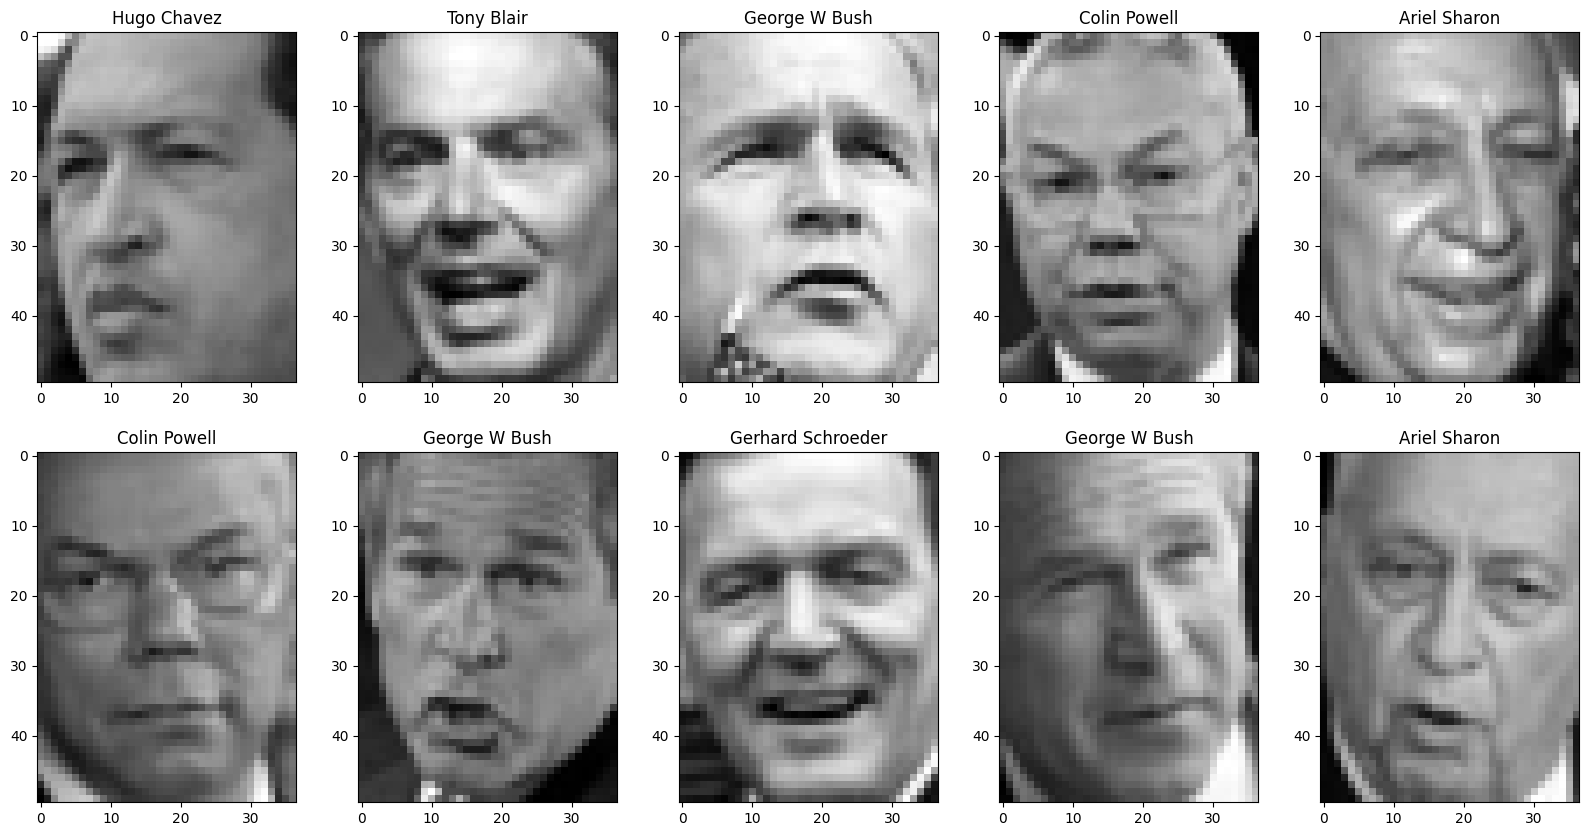

In [ ]:
# 이미지 실제 확인
samples = data[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(target_names[target[idx]])

In [ ]:
# data split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [ ]:
print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 901, 0.70
test_data size: 387, 0.30


In [ ]:
# data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(train_data)

StandardScaler()

In [ ]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

## Eigenface
Eigenface란 PCA를 이용해 얼굴 사진을 축소하면 생기는 eigenvector가 얼굴 모양과 같다고 하여서 생긴 용어

In [ ]:
# 학습
from sklearn.decomposition import PCA

pca = PCA()

In [ ]:
pca.fit(scaled_train_data)

PCA()

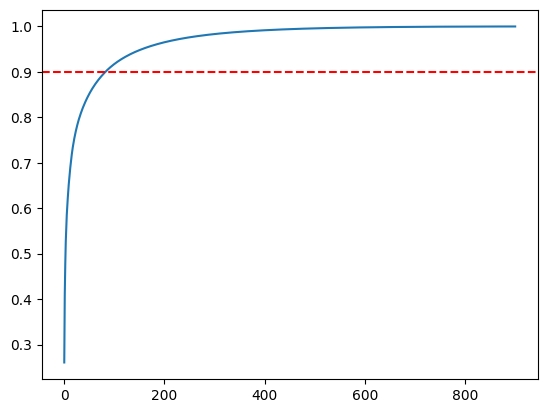

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axhline(0.9, color="red", linestyle="--")

In [ ]:
# explained variance ratio가 0.9가 되는 지점의 component를 사용

pca = PCA(n_components=0.9)
pca.fit(scaled_train_data)

PCA(n_components=0.9)

In [ ]:
pca_train_data = pca.transform(scaled_train_data)
pca_test_data = pca.transform(scaled_test_data)

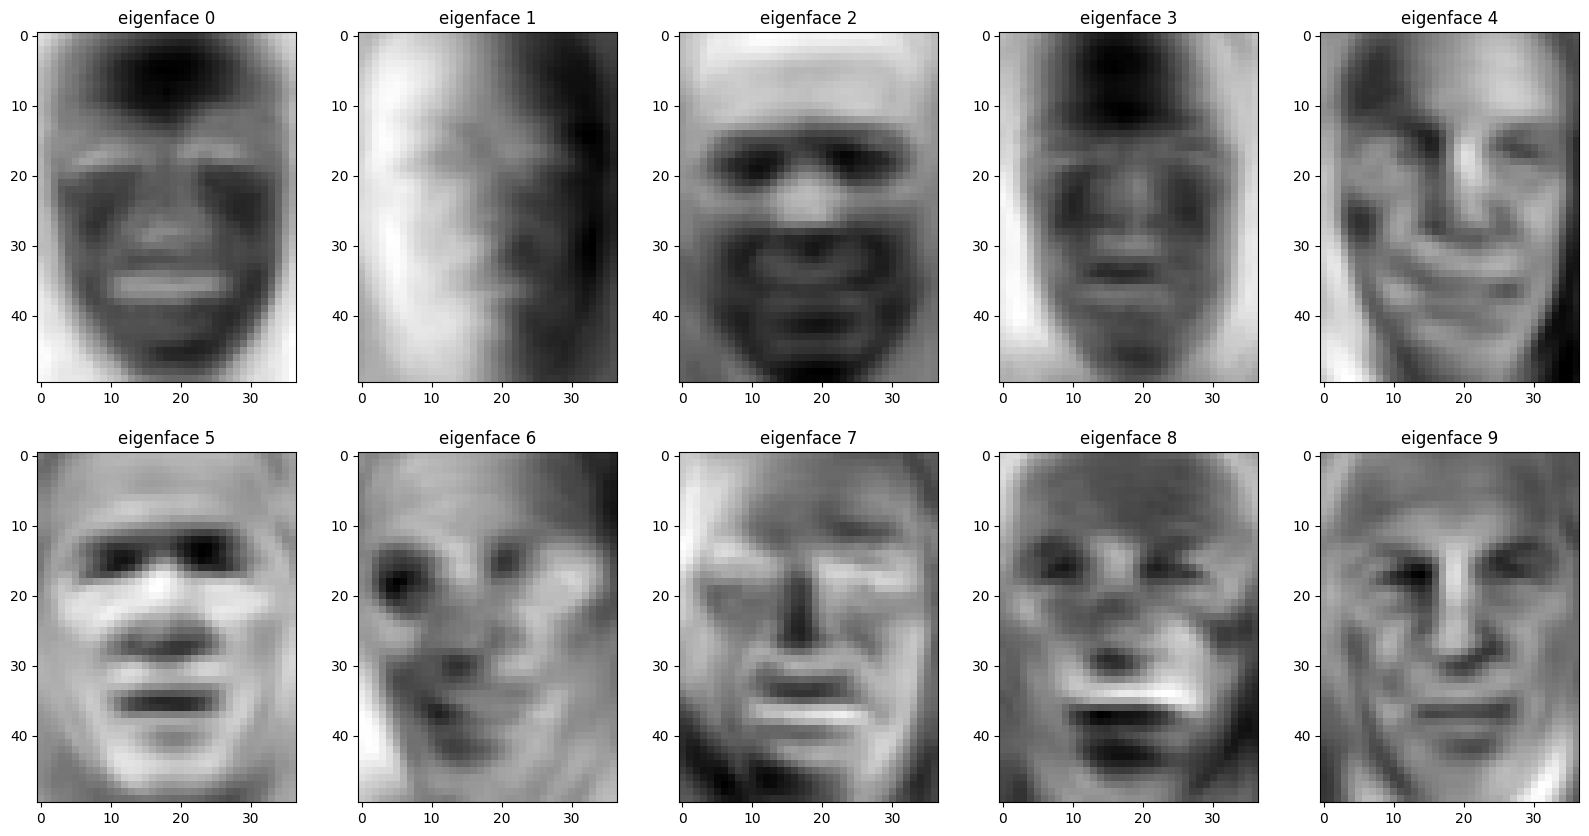

In [ ]:
# 시각화
# PCA를 통해 다음 eigen vector에 나오는 얼굴의 특징을 추출한다고 생각

eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
samples = eigenfaces[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(f"eigenface {idx}")

## SVM

In [ ]:
# Baseline의 결과

from sklearn.svm import SVC

svm = SVC()
svm.fit(scaled_train_data, train_target)

SVC()

In [ ]:
train_pred = svm.predict(scaled_train_data)
test_pred = svm.predict(scaled_test_data)

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

In [ ]:
print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 0.9501
test accuracy is 0.7209


In [ ]:
# Eigenface - SVM 학습
eigenface_svm = SVC()
eigenface_svm.fit(pca_train_data, train_target)

SVC()

In [ ]:
pca_train_pred = eigenface_svm.predict(pca_train_data)
pca_test_pred = eigenface_svm.predict(pca_test_data)

In [ ]:
pca_train_acc = accuracy_score(train_target, pca_train_pred)
pca_test_acc = accuracy_score(test_target, pca_test_pred)

In [ ]:
print(f"Eigenface train accuracy is {pca_train_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")

Eigenface train accuracy is 0.9279
Eigenface test accuracy is 0.7390


## 비교 보기


In [ ]:
train_data.shape

(901, 1850)

In [ ]:
pca_train_data.shape

(901, 83)

In [ ]:
print(f"Baseline test accuracy is {test_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")

Baseline test accuracy is 0.7209
Eigenface test accuracy is 0.7390
